## BERT результаты
- Результаты тестирования социальных сетей извлечённых с помощью предобученной модели BERT
- Код генерации социальных сетей
- образцы полученных эмбедингов визуализированные с помощью TSNE 

AGGREGATED RESULTS: Model asoif_bert_allbooks_cased : CF-favorite is number one choice: 6.666666666666667 , CF-favorite is in top2: 10.0  
AGGREGATED RESULTS: Model asoif_bert_firstbook_cased : CF-favorite is number one choice: 6.666666666666667 , CF-favorite is in top2: 13.333333333333334  
AGGREGATED RESULTS: Model asoif_bert_allbooks_uncased : CF-favorite is number one choice: 13.333333333333334 , CF-favorite is in top2: 13.333333333333334  
AGGREGATED RESULTS: Model asoif_bert_firstbook_uncased : CF-favorite is number one choice: 10.0 , CF-favorite is in top2: 16.666666666666664  



DETAILED RESULTS (DEFAULT): Model asoif_bert_allbooks_cased : simple aggreement betw CF (gold standard) and model: 13.333333333333334  
DETAILED RESULTS (DEFAULT): Model asoif_bert_firstbook_cased : simple aggreement betw CF (gold standard) and model: 16.666666666666664  
DETAILED RESULTS (DEFAULT): Model asoif_bert_allbooks_uncased : simple aggreement betw CF (gold standard) and model: 20.0  
DETAILED RESULTS (DEFAULT): Model asoif_bert_firstbook_uncased : simple aggreement betw CF (gold standard) and model: 16.666666666666664  



DETAILED RESULTS (PLUS_N):  Model asoif_bert_allbooks_cased : simple aggreement betw CF (gold standard) and model: 20.0  
DETAILED RESULTS (PLUS_N):  Model asoif_bert_firstbook_cased : simple aggreement betw CF (gold standard) and model: 26.666666666666668  
DETAILED RESULTS (PLUS_N):  Model asoif_bert_allbooks_uncased : simple aggreement betw CF (gold standard) and model: 28.333333333333332  
DETAILED RESULTS (PLUS_N):  Model asoif_bert_firstbook_uncased : simple aggreement betw CF (gold standard) and model: 26.666666666666668  


In [1]:
import h5py
import numpy as np
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from itertools import chain

%matplotlib inline

In [2]:
char_data = [['Robert', 126],
             ['Jon', 111],
             ['Robb', 104],
             ['Jaime', 98],
             ['Cersei', 96],
             ['Sansa', 96],
             ['Joffrey', 95],
             ['Tywin', 86],
             ['Tyrion', 84],
             ['Stannis', 80],
             ['Catelyn', 75],
             ['Bran', 74],
             ['Arya', 72],
             ['Ned', 68],
             ['Renly', 68],
             ['Hound', 57],
             ['Varys', 49],
             ['Lysa', 47],
             ['Tommen', 46],
             ['Pycelle', 45],
             ['Balon', 43],
             ['Loras', 41],
             ['Theon', 40],
             ['Petyr', 40],
             ['Edmure', 37],
             ['Barristan', 35],
             ['Roose', 35],
             ['Margaery', 32],
             ['Hoster', 31],
             ['Myrcella', 31],
            ]

In [3]:
chars = [c[0] for c in char_data]

In [4]:
def load_data(embedding_files,
              tokenized_text_files,
              num = 1,
             ):
    raw_embs = []
    for i in range(num):
        raw_embs.append(h5py.File(embedding_files %(i+1), 'r'))
        
    texts = []
    for i in range(num):
        with open(tokenized_text_files %(i+1), 'r') as f:
            text = f.read().split("\n")
        texts.append([t.split() for t in text])
    
    return raw_embs, texts

In [26]:
def collect_char_vectors(raw_embs,
                         texts,
                         chars,
                         text_ids = None,
#                          layers_ids = None,
                        ):
    if text_ids is None:
        text_ids = [i for i in range(len(texts))]
    
#     if layers_ids is None:
#         layers_ids = [0,1,2]

    char_emb = dict(zip(chars, [[] for i in range(len(chars))]))

    for i, curd in enumerate(texts):
        if i not in text_ids:
            continue

        for j, sent in tqdm(enumerate(curd)):
            for k, token in enumerate(sent):
                token_upper = token[:1].upper() + token[1:]
                if token_upper not in chars:
                    continue

#                 emb_temp = []
#                 for l in layers_ids:
#                     emb_temp.append(raw_embs[i][str(j)][l][k])

#                 char_emb[token].append(np.array(emb_temp).mean(axis = 0))
                char_emb[token_upper].append((raw_embs[i][str(j)][k]))

    return char_emb

In [6]:
def save_model(path, char_emb):
    with open(path, 'w') as fout:
        fout.write(f'{len(char_emb)} {len(list(char_emb.values())[0][0])}\n')
        for key,e in char_emb.items():
            fout.write(f"{key} {' '.join(map(str, np.array(e).mean(axis = 0)))} \n")

In [7]:
def tsne_plot(char_emb,
              chnames = ["Robert", "Catelyn", "Sansa", "Ned"],
              cols = ['r', 'b', 'k', 'm'],              
             ):
    tsne_model = TSNE(perplexity=10, n_components=2, init='random', n_iter=500)
    
    lens = [len(char_emb[name]) for name in chnames]
    colarray = []
    ind = 0
    
    
    new_values = tsne_model.fit_transform(list(chain.from_iterable([char_emb[name] for name in chnames])))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        for k in range(len(chnames)):
            if ind < sum(lens[:k+1]):
                colarray.append(cols[k])
                break
        ind += 1
        
    plt.figure(figsize=(18, 12)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i],c=colarray[i])
    plt.show()

### BERT обученная на  book_corpus_wiki_en_cased (с учётом регистра)

In [8]:
embedding_files = '/media/data/Diploma data/bert_embedding_last_%d.hdf5'
tokenized_text_files = "/home/konstantin/Downloads/bert_dataset_file_last_%d.txt"

### 5 книг cased

In [9]:
text_ids = [0,1,2,3,4,]
model_path = "asoif_bert_allbooks_cased.model"

20788it [00:13, 1523.86it/s]
21812it [00:21, 1007.84it/s]
36962it [00:30, 1226.94it/s]
21229it [00:16, 1294.84it/s]
29432it [00:22, 1326.87it/s]


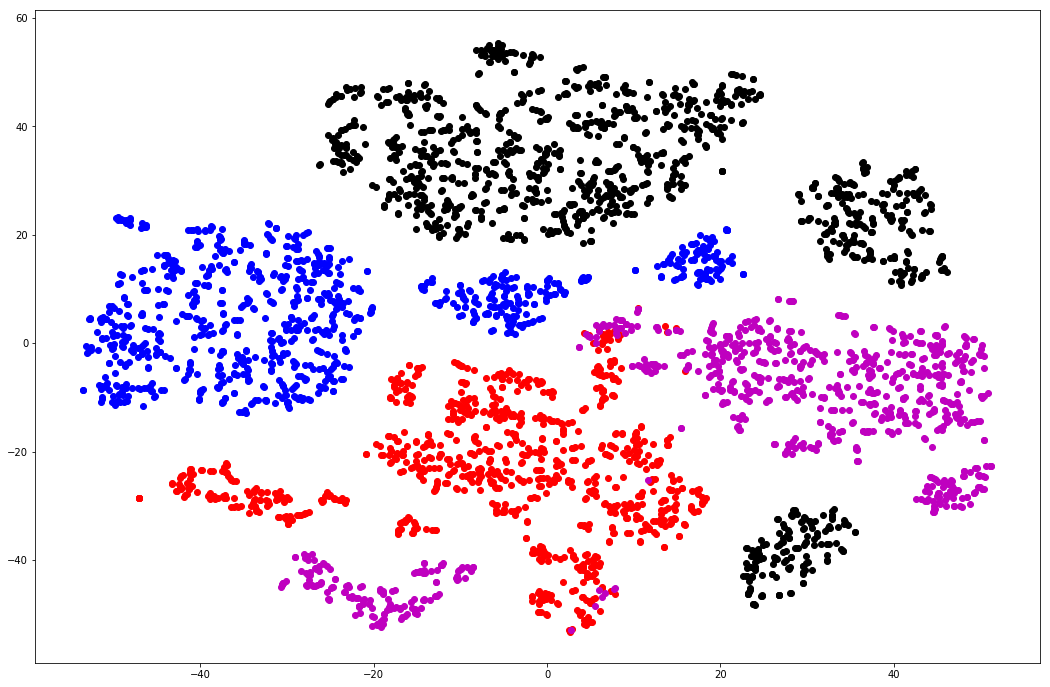

In [10]:
raw_embs, texts = load_data(embedding_files, tokenized_text_files, num = 5)
char_emb = collect_char_vectors(raw_embs, texts, chars, text_ids = text_ids)
save_model(model_path, char_emb)
tsne_plot(char_emb)

### 1 книга cased

In [14]:
text_ids = [0,]
model_path = "asoif_bert_firstbook_cased.model"

20788it [00:14, 1407.64it/s]


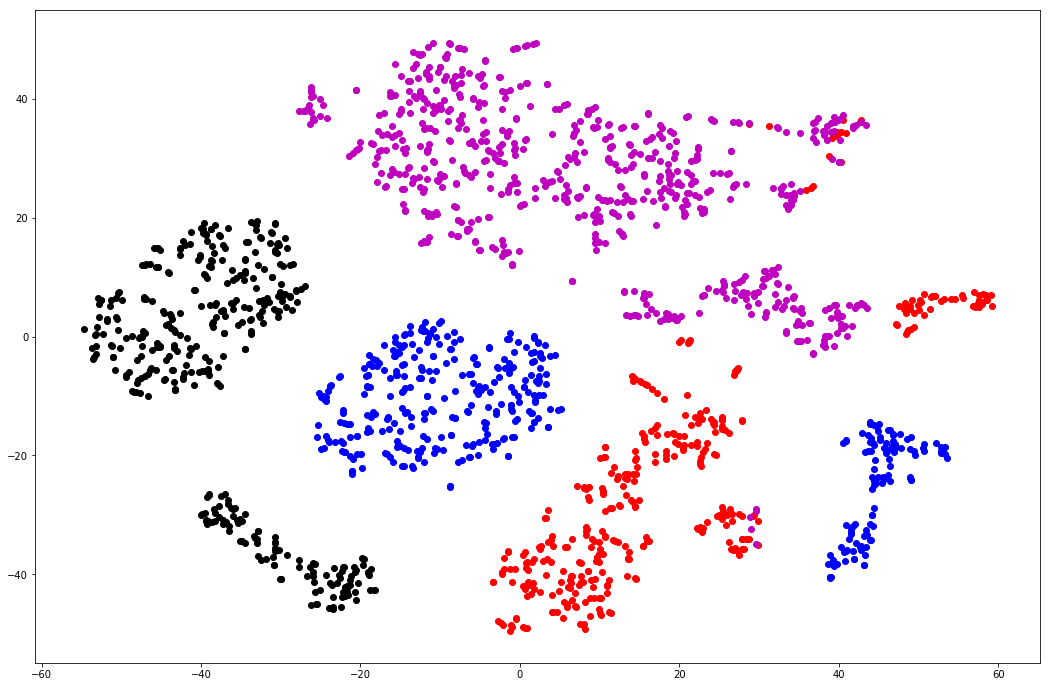

In [15]:
raw_embs, texts = load_data(embedding_files, tokenized_text_files, num = 5)
char_emb = collect_char_vectors(raw_embs, texts, chars, text_ids = text_ids)
save_model(model_path, char_emb)
tsne_plot(char_emb)

### 5 книг cased близкие персонажи

In [16]:
text_ids = [0,1,2,3,4,]
cols = ['y', 'orange', 'g', 'k']
chnames = ["Cersei", "Jaime", "Tyrion", "Tywin"]

20788it [00:12, 1605.67it/s]
21812it [00:15, 1396.45it/s]
36962it [00:19, 1885.69it/s]
21229it [00:07, 3021.11it/s]
29432it [00:09, 2969.88it/s]


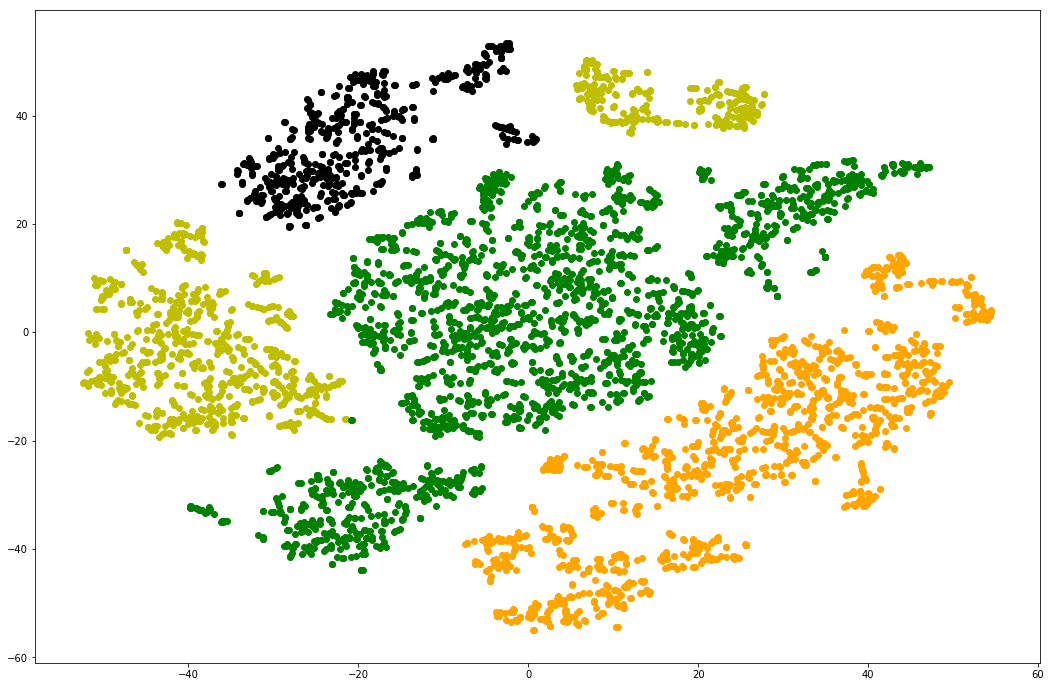

In [17]:
raw_embs, texts = load_data(embedding_files, tokenized_text_files, num = 5)
char_emb = collect_char_vectors(raw_embs, texts, chars, text_ids = text_ids)
tsne_plot(char_emb, cols=cols, chnames=chnames)

### 1 книга cased близкие персонажи

In [18]:
text_ids = [0,]
cols = ['y', 'orange', 'g', 'k']
chnames = ["Cersei", "Jaime", "Tyrion", "Tywin"]

20788it [00:12, 1691.70it/s]


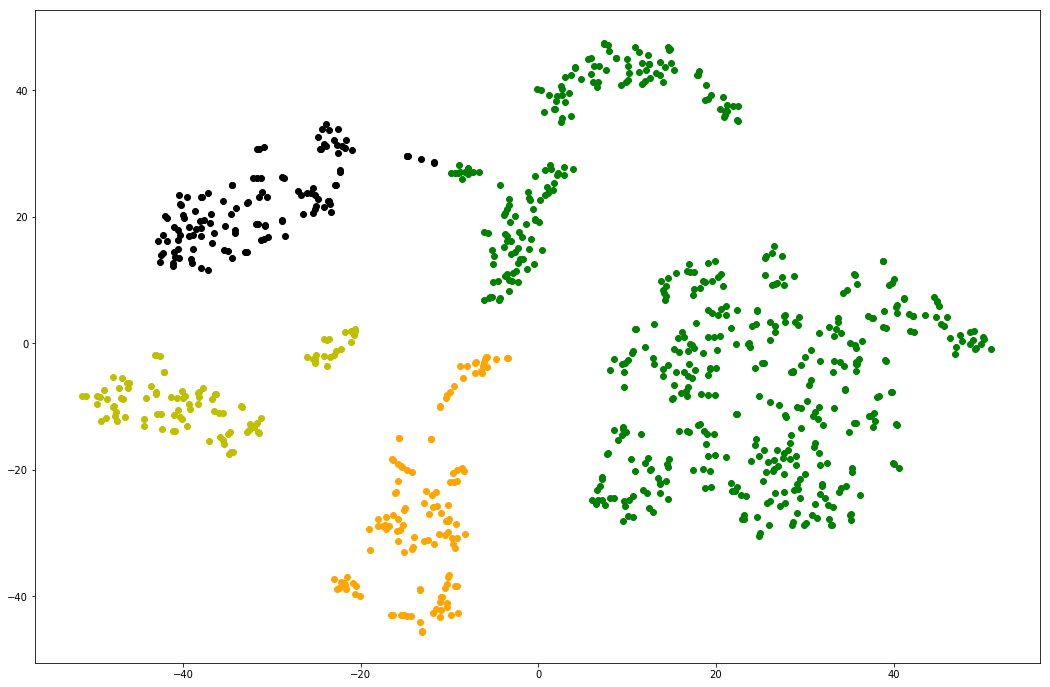

In [19]:
raw_embs, texts = load_data(embedding_files, tokenized_text_files, num = 5)
char_emb = collect_char_vectors(raw_embs, texts, chars, text_ids = text_ids)
tsne_plot(char_emb, cols=cols, chnames=chnames)

### BERT обученная на  book_corpus_wiki_en_uncased (без учёта регистра)

In [20]:
embedding_files = '/media/data/Diploma data/bert_embedding_768_uncased_%d.hdf5'
tokenized_text_files = "/home/konstantin/Downloads/bert_dataset_file_768_uncased_%d.txt"

### 5 книг uncased

In [21]:
text_ids = [0,1,2,3,4,]
model_path = "asoif_bert_allbooks_uncased.model"

20788it [00:22, 934.08it/s]
21812it [00:22, 984.83it/s]
36962it [00:31, 1190.83it/s]
21229it [00:16, 1273.83it/s]
29432it [00:22, 1330.50it/s]


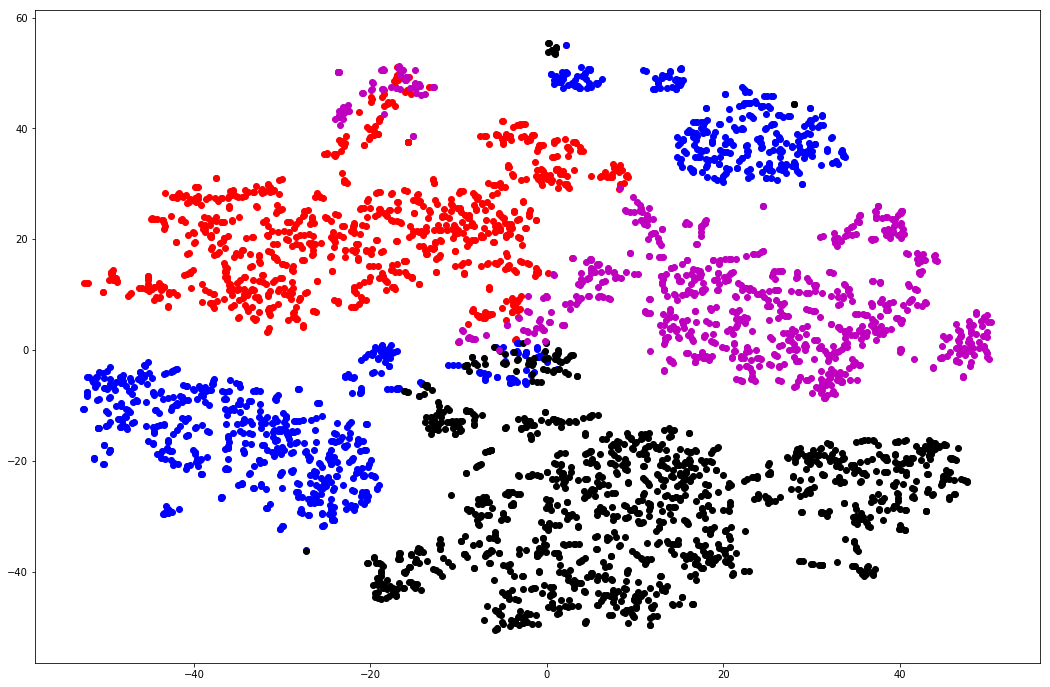

In [27]:
raw_embs, texts = load_data(embedding_files, tokenized_text_files, num = 5)
char_emb = collect_char_vectors(raw_embs, texts, chars, text_ids = text_ids)
save_model(model_path, char_emb)
tsne_plot(char_emb)

### 1 книга uncased

In [28]:
text_ids = [0,]
model_path = "asoif_bert_firstbook_uncased.model"

20788it [00:19, 1059.02it/s]


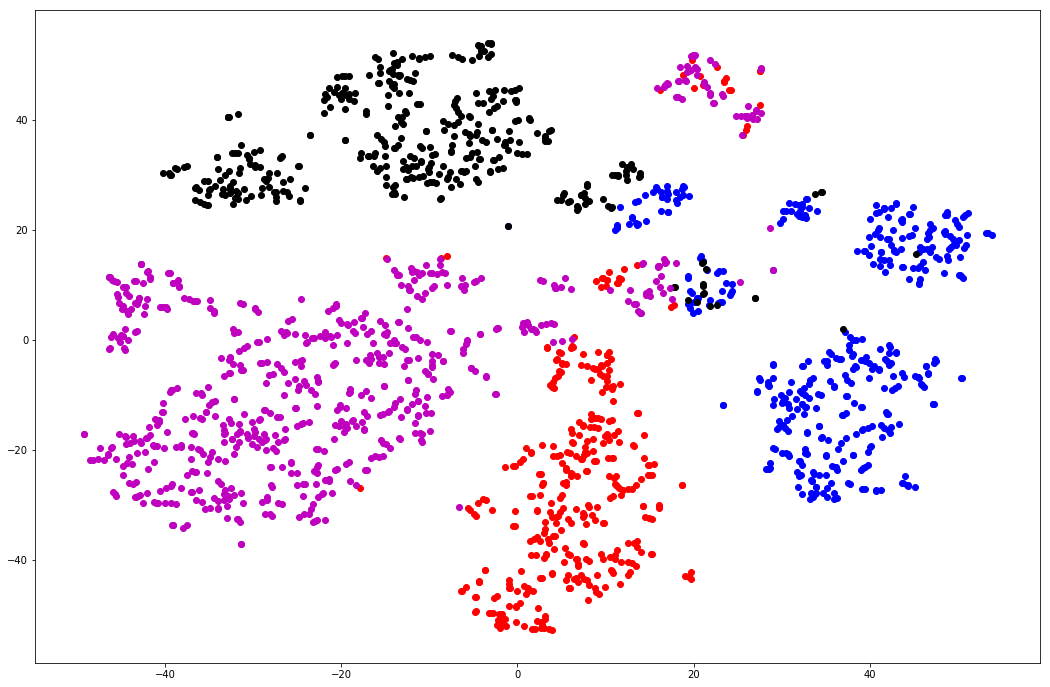

In [29]:
raw_embs, texts = load_data(embedding_files, tokenized_text_files, num = 5)
char_emb = collect_char_vectors(raw_embs, texts, chars, text_ids = text_ids)
save_model(model_path, char_emb)
tsne_plot(char_emb)

### 5 книг uncased близкие персонажи

In [30]:
text_ids = [0,1,2,3,4,]
cols = ['y', 'orange', 'g', 'k']
chnames = ["Cersei", "Jaime", "Tyrion", "Tywin"]

20788it [00:12, 1601.52it/s]
21812it [00:19, 1146.91it/s]
36962it [00:20, 1809.56it/s]
21229it [00:06, 3106.05it/s]
29432it [00:09, 3090.28it/s]


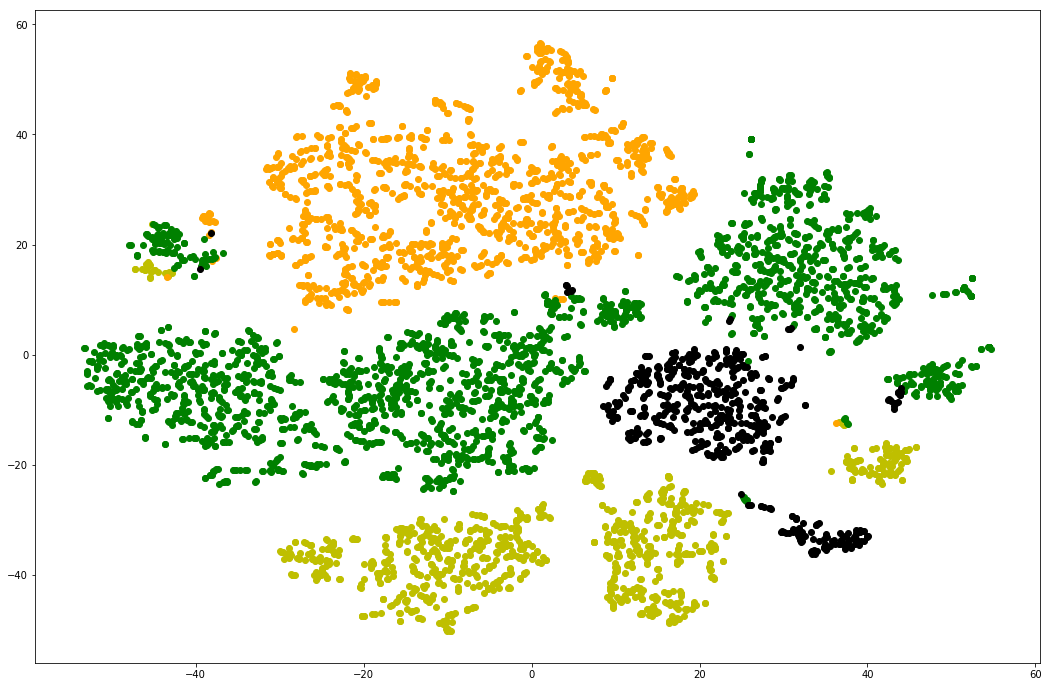

In [31]:
raw_embs, texts = load_data(embedding_files, tokenized_text_files, num = 5)
char_emb = collect_char_vectors(raw_embs, texts, chars, text_ids = text_ids)
tsne_plot(char_emb, cols=cols, chnames=chnames)

### 1 книга uncased близкие персонажи

In [32]:
text_ids = [0,]
cols = ['y', 'orange', 'g', 'k']
chnames = ["Cersei", "Jaime", "Tyrion", "Tywin"]

20788it [00:14, 1425.66it/s]


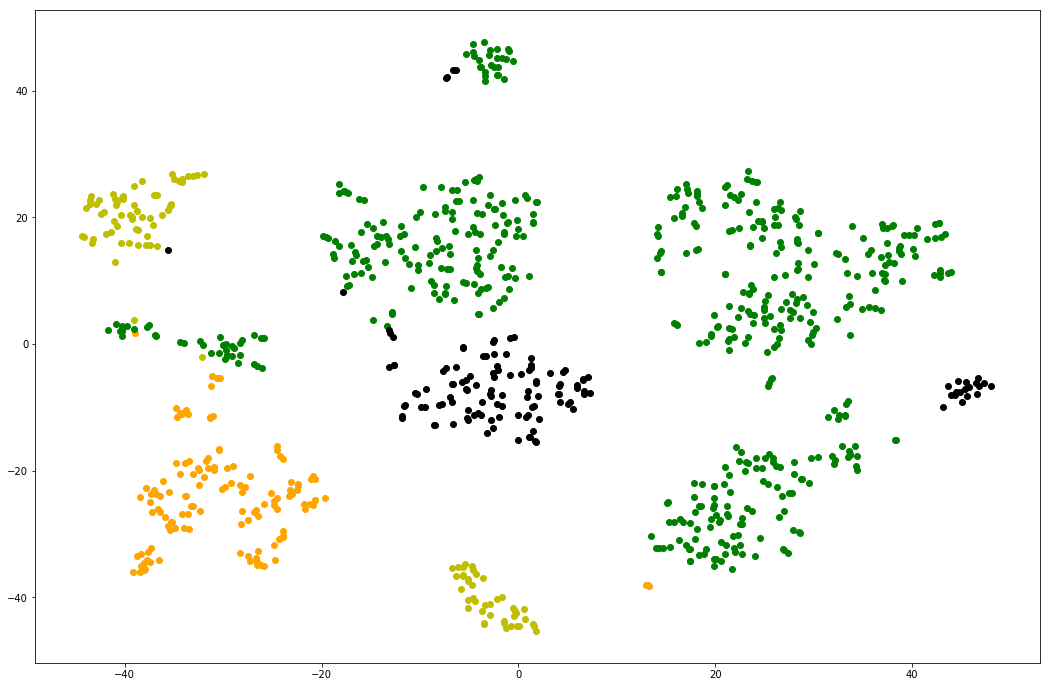

In [33]:
raw_embs, texts = load_data(embedding_files, tokenized_text_files, num = 5)
char_emb = collect_char_vectors(raw_embs, texts, chars, text_ids = text_ids)
tsne_plot(char_emb, cols=cols, chnames=chnames)